# VISUALIZATIONS
In this task, we will be visualizing categorical and continuous variables using various plots and charts.
The data is provided 

Sample Dataset :- https://github.com/Prodigy-InfoTech/data-science-datasets/tree/main/Task%201

In [85]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import plotly.express as px

# Load data
df = pd.read_csv(r'Data/World Population.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


The data contains the population of different countries over the years. From 1960 to 2024.

## Data Preparation

In [86]:
# Check for missing values
print(f"Number of missing values per column:\n{df.isnull().sum()}")

# Drop rows with missing values
df.dropna(inplace=True)

Number of missing values per column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2020              1
2021              1
2022              1
2023              1
2024              1
Length: 69, dtype: int64


To handle missing values, we first checked for any missing values in the dataset. After identifying the missing values, we decided to drop any rows that contained them. This is because the entire row contained missing population data and imputing such values could lead to inaccurate analyses. Therefore, we opted for a complete case analysis by removing these rows from the dataset.

In [87]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [88]:
# Data description
print(f"Data description:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    float64


In [89]:
# Transform data 
data = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year", 
    value_name="Population"
)

# Convert Year to numeric
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data.head()

# Save the cleaned data
data.to_csv(r"Data/cleaned_data.csv", index=False)


## Exploratory Data Analysis (EDA)


In [90]:
# World Population by Country (2024)
data_map = data[data["Year"] == 2024]
fig = px.choropleth(
    data_map,
    locations="Country Code",
    color="Population",
    hover_name="Country Name",
    color_continuous_scale="Viridis",
    title="World Population by Country (2024)"
)
fig.show()

Since we are dealing with a lot of countries, it might be helpful to aggregate the data by region to get a clearer picture of population trends.

We will only include the data for East Africa.

In [91]:
# Include only East Africa
east_africa_countries = [
    'Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda'
]
ea_data = data[data['Country Name'].isin(east_africa_countries)]

# Save the filtered data
ea_data.to_csv(r"Data/east_africa_population_data.csv", index=False)

**Visualizing the trend of East African countries' populations**

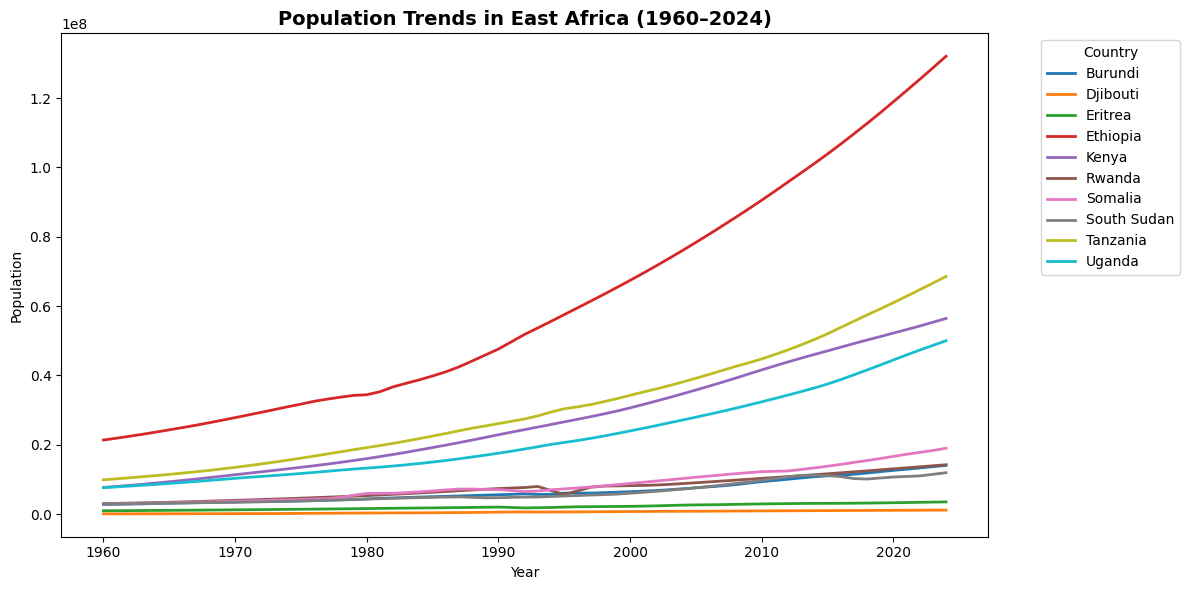

In [92]:
# Line plots of East African countries' populations
plt.figure(figsize=(12,6))
sns.lineplot(data=ea_data, x="Year", y="Population", hue="Country Name", linewidth=2.0)

plt.title("Population Trends in East Africa (1960–2024)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Comparing Population Growth in East Africa**

Instead of comparing the row populations, we can compare the growth rate of the populations over time. This will give us a clearer picture of how each country's population is changing relative to its own past.


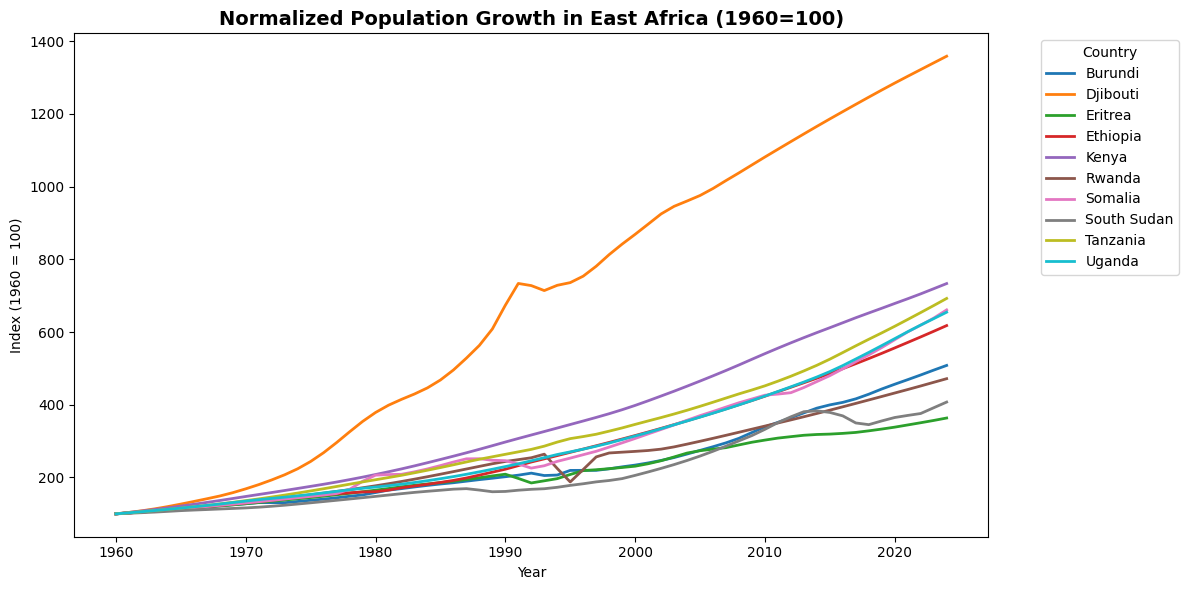

In [93]:
# Normalizing the data
subset = ea_data.copy()
subset["Normalized"] = subset.groupby("Country Name")["Population"].transform(
    lambda x: (x / x.iloc[0]) * 100
)

# Lineplot for normalized data

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x="Year", y="Normalized", hue="Country Name", linewidth=2.0)

plt.title("Normalized Population Growth in East Africa (1960=100)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Index (1960 = 100)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

For this, we can conclude that `Djibouti` has experienced the most significant population growth rate among East African countries. 

The massive drop in `Rwanda's` population between 1994 to 1996 is as a result of the genocide that took place in those years claiming the lives of millions.

Most countries have had a steady population growth over the years apart from `South Sudan` between the year 2018 to 2020. This drop in the population growth is as a result of the civil and political unrests.


**Comparing the average population for East African countries**

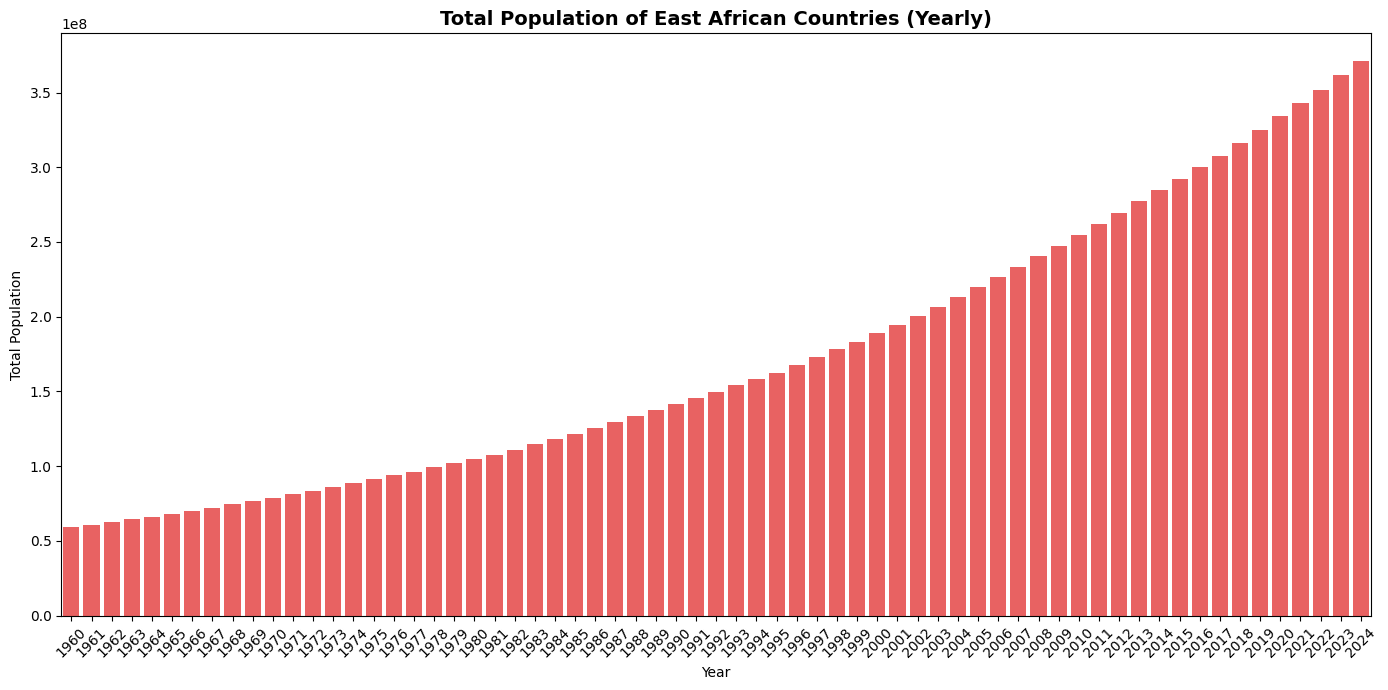

In [94]:
# Group by year and sum populations across EA countries
ea_total = subset.groupby("Year")["Population"].sum().reset_index()

# Bar chart
plt.figure(figsize=(14,7))
sns.barplot(data=ea_total, x="Year", y="Population", color="red", alpha = 0.7)
plt.title("Total Population of East African Countries (Yearly)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The total population of East African countries has shown a steady increase over the years, with notable fluctuations due to various socio-political factors such as conflicts, economic changes, and health crises.

**In 2024, the population distribution among East African countries is as follows:**

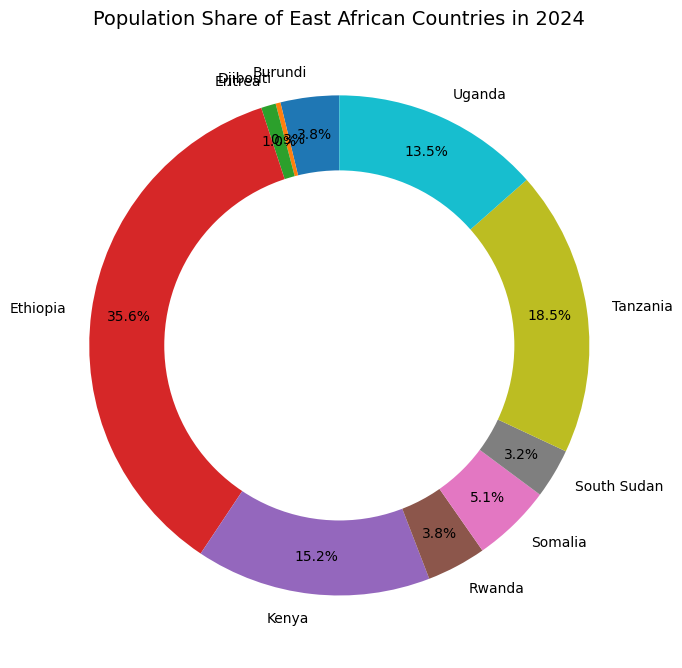

In [95]:
year = 2024
ea_year = ea_data[ea_data["Year"] == year]

# Aggregate per country
pop_by_country = ea_year.groupby("Country Name")["Population"].sum()

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    pop_by_country,
    labels=pop_by_country.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

# Donut hole
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig.gca().add_artist(centre_circle)

ax.set_title(f"Population Share of East African Countries in {year}", fontsize=14)
plt.tight_layout()
plt.show()